In [1]:
import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import muon as mu
import scirpy as ir
np.random.seed(42)
import random
random.seed(42)

2025-08-25 10:59:16.706861: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 10:59:20.452907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756133961.887453 1207773 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756133962.187509 1207773 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756133966.598151 1207773 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## load mdata

In [2]:
%cd /ihome/ylee/yiz133/Code/Data processing

/ihome/ylee/yiz133/Code/Data processing


In [3]:
mdata1 = mu.read('Tonly_CNS_DE2000.h5mu')
state_1 = pd.concat([mdata1['gex'].obs['state'], mdata1['airr'].obs['clone_id_size']], axis = 1)

mdata2 = mu.read('Tonly_SPL_DE2000.h5mu')
state_2 = pd.concat([mdata2['gex'].obs['state'], mdata2['airr'].obs['clone_id_size']], axis = 1)

df = pd.concat([state_1, state_2], axis= 0)
# df.to_csv('T_states.csv')

In [4]:
%cd /ihome/ylee/yiz133/Code/data_EAE/anndata

/ihome/ylee/yiz133/Code/data_EAE/anndata


In [55]:
mdata = mu.read("all_Common_DEtop2000.h5mu")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/software/rhel9/manual/install/python/ondemand-jupyter-python3.11-2023.09/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/scratch/slurm-6173810/ipykernel_1207773/2413132288.py", line 1, in <module>
    mdata = mu.read("all_Common_DEtop2000.h5mu")
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ihome/ylee/yiz133/.local/lib/python3.11/site-packages/mudata/_core/io.py", line 698, in read
    if isinstance(filename, str) or isinstance(filename, Path):
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ihome/ylee/yiz133/.local/lib/python3.11/site-packages/mudata/_core/io.py", line 430, in read_h5mu
  File "/ihome/ylee/yiz133/.local/lib/python3.11/site-packages/mudata/_core/io.py", line 363, in _validate_h5mu
    #
      
  File "/software/rhel9/manual/install/python/ondemand-jupyter-python3.11-2023.09/lib/python3.11/pathlib.py", li

In [6]:
common_obs = mdata1.obs_names.intersection(mdata.obs_names).to_list() + mdata2.obs_names.intersection(mdata.obs_names).to_list()
mdata = mdata[common_obs,:]
mdata

View of MuData object with n_obs × n_vars = 43562 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample', 'mouse_BC'
  2 modalities
    gex:	43562 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'mouse_BC'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	43562 x 0
      obsm:	'airr'

In [7]:
# exclude 2D2 transfer samples

selected_samples_id = ["CMO301", "CMO302", "CMO318", "CMO325"]
selected_date = ["0516"]
selected_tissue = ["CN"]

mdata = mdata[~ (mdata['gex'].obs["mouse_BC"].isin(selected_samples_id) & mdata["gex"].obs["date"].isin(selected_date))]

meta_airr = ir.get.airr(mdata['airr'], ["cdr3_aa", "v_call", "j_call"] ,  ('VJ_1', 'VDJ_1'))

mdata.obs = mdata.obs.join(meta_airr)

mdata

MuData object with n_obs × n_vars = 43448 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample', 'mouse_BC', 'VJ_1_cdr3_aa', 'VJ_1_v_call', 'VJ_1_j_call', 'VDJ_1_cdr3_aa', 'VDJ_1_v_call', 'VDJ_1_j_call'
  2 modalities
    gex:	43448 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'mouse_BC'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	43448 x 0
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

## clonotype

In [8]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

# by nucleotide acid seq
ir.pp.ir_dist(mdata)
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")
ir.tl.clonotype_network(mdata, min_cells=10)

# print("The num of clones is " + mdata['airr'].obs['clone_id'][-1])

In [9]:
# select cells appear in both CNS and SPL

# thresh on clono size
clone_thresh = 2
mdata.obs['cloned'] = mdata['airr'].obs['clone_id_size'] >= clone_thresh

# Check if appear in two tissues
mdata_cloned = mdata[mdata.obs['cloned']]
clone_tissue_df = mdata_cloned['airr'].obs[['clone_id']].join(mdata_cloned['gex'].obs['tissue'])
clone_tissue_counts = clone_tissue_df.groupby('clone_id')['tissue'].nunique()
multi_tissue_clones = clone_tissue_counts[clone_tissue_counts > 1].index
mdata.obs['in_two_tissue'] = mdata['airr'].obs['clone_id'].isin(multi_tissue_clones)


# Step 1: Extract clone_id and tissue info
# clone_tissue_df = mdata['airr'].obs[['clone_id']].join(mdata['gex'].obs['tissue'])
# # Step 2: Group by clone_id and count unique tissues
# clone_tissue_counts = clone_tissue_df.groupby('clone_id')['tissue'].nunique()
# # Step 3: Find clone_ids that appear in more than one tissue
# multi_tissue_clones = clone_tissue_counts[clone_tissue_counts > 1].index
# mdata.obs['in_two_tissue'] = mdata['airr'].obs['clone_id'].isin(multi_tissue_clones)

mdata.obs['in_two_tissue'].value_counts()

in_two_tissue
False    40456
True      2992
Name: count, dtype: int64

## TCR dist

In [10]:
%cd "/ihome/ylee/yiz133/Code/Data processing/data/TCRdist"

/ihome/ylee/yiz133/Code/Data processing/data/TCRdist


In [11]:
from tcrdist.repertoire import TCRrep
# formating by tcrdist requirements
ref_df = pd.read_csv('IEDB_MOG_tcrs.csv')
ref_df.rename(columns={'Chain 2 CDR3': 'cdr3_b_aa', 'Chain 2 V Gene':'v_b_gene', 
                   'Chain 2 J Gene':'j_b_gene', }, inplace=True)

ref_df['v_b_gene'] = ref_df['v_b_gene'].apply(lambda x: str(x) if str(x).endswith('*01') else str(x) + '*01')
ref_df['j_b_gene'] = ref_df['j_b_gene'].apply(lambda x: str(x) if str(x).endswith('*01') else str(x) + '*01')


In [12]:
mdata_subset = mdata[mdata.obs['cloned'] & ~mdata.obs['in_two_tissue']]
mdata_subset2 = mdata[mdata.obs['in_two_tissue']]
mdata_subset3 = mdata[~mdata.obs['cloned']]     

mdataSub_list = [mdata]

In [13]:
def mdata_TCR_formating(mdata_subset):
    query_df = mdata_subset.obs[['VDJ_1_cdr3_aa', 'VDJ_1_v_call', 'VDJ_1_j_call']]
    query_df['cell_id'] = query_df.index
    query_df.dropna(subset = ["VDJ_1_cdr3_aa"])

    query_df.rename(columns={'VDJ_1_cdr3_aa': 'cdr3_b_aa', 'VDJ_1_v_call':'v_b_gene', 
                       'VDJ_1_j_call':'j_b_gene', }, inplace=True)

    # 'VDJ_1_consensus_count':'count'
    query_df['cdr3_b_aa'] = 'C' + query_df['cdr3_b_aa'] + 'F'

    query_df['v_b_gene'] = query_df['v_b_gene'].str.split('+').str[0]
    query_df['j_b_gene'] = query_df['j_b_gene'].str.split('+').str[0]

    query_df['v_b_gene'] = query_df['v_b_gene'].apply(lambda x: str(x) if str(x).endswith('*01') else str(x) + '*01')
    query_df['j_b_gene'] = query_df['j_b_gene'].apply(lambda x: str(x) if str(x).endswith('*01') else str(x) + '*01')

    # query_df_clones = query_df_clones.drop(columns=["cell_id"])
    query_df_unique = query_df.drop_duplicates(['cdr3_b_aa'])
    return query_df_unique


In [14]:
def TCRdist_to_ref(ref_df, query_df_unique):
    tr_ref = TCRrep(cell_df = ref_df, 
                organism = 'mouse', 
                chains = ['beta'],
                compute_distances = False,)

    tr_q = TCRrep(cell_df = query_df_unique, 
                organism = 'mouse', 
                chains = ['beta'],
                compute_distances = False,)

    tr_ref.compute_rect_distances(tr_ref.clone_df,  tr_q.clone_df)
    print(tr_ref.rw_beta.shape)
    print(tr_ref.rw_beta)
    return tr_ref, tr_q


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

dist_thres = 85
tr_list = []
for m_sub in mdataSub_list:
    query_df = mdata_TCR_formating(m_sub)
    
    tr_out, tr_query = TCRdist_to_ref(ref_df, query_df)
    tr_list.append(tr_out)
    flat_arr = tr_out.rw_beta.min(axis=0).flatten()
    TCR_all = tr_query.clone_df
    TCR_all['TCRdist_MOG'] = flat_arr
    
    selected_clone_id = flat_arr < dist_thres
    TCR_selected = TCR_all[selected_clone_id]
    
# # Example 2D array
# arr = tr.rw_beta.min(axis=0)

# # Flatten to 1D
# flat_arr = arr.flatten()
TCR_all


(25, 32401)
[[126 134 142 ... 126 114 126]
 [122 127 152 ... 141 129 141]
 [162 155 124 ... 150 126 150]
 ...
 [114 134 142 ... 126 114 126]
 [126 134 142 ... 126 111 126]
 [138 146 118 ... 138 120 132]]


,cdr3_b_aa,v_b_gene,j_b_gene,cdr1_b_aa,cdr2_b_aa,pmhc_b_aa,count,clone_id,TCRdist_MOG
0,CAAAGGQNTLYF,TRBV2*01,TRBJ2-4*01,LGH.......NA,YSY....QKL,S.KKNH,1,1,107
1,CAAAGVSNERLFF,TRBV14*01,TRBJ1-4*01,SGH.......DT,FRD....EAV,P.KGTN,1,2,122
2,CAADRGGTGQLYF,TRBV31*01,TRBJ2-2*01,GKS......SPN,SIT.....VG,P.KDDQ,1,3,118
3,CAAGAGSSGNTLYF,TRBV19*01,TRBJ1-3*01,FNH.......DT,SIT....END,E.KKSS,1,4,72
4,CAAGEDTQYF,TRBV12-2*01,TRBJ2-5*01,SGH.......LS,HYD....KME,F.DDYH,1,5,98
...,...,...,...,...,...,...,...,...,...
32396,CTCTRTGGFYAEQFF,TRBV1*01,TRBJ2-1*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32397,90
32397,CTCTTNQDTQYF,TRBV1*01,TRBJ2-5*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32398,126
32398,CTCWGGAATQYF,TRBV1*01,TRBJ2-5*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32399,114
32399,CTGQGGAEQFF,TRBV1*01,TRBJ2-1*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32400,102


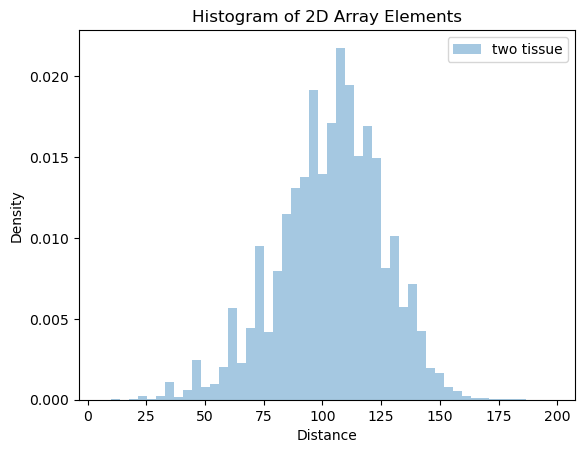

In [16]:
# Plot KDE (Kernel Density Estimate)
plt.hist(flat_arr, bins=50, density=True, alpha=0.4)
plt.legend(['two tissue', 'one tissue'])
plt.title("Histogram of 2D Array Elements")
plt.xlabel("Distance")
plt.ylabel("Density")
plt.show()

In [17]:
mdata_temp = mdata_subset2

my_dict = dict(zip(mdata_temp.obs['VDJ_1_cdr3_aa'], mdata_temp['airr'].obs['clone_id_size']))
TCR_selected['cdr3_b_aa_trimed'] = TCR_selected['cdr3_b_aa'].str[1:-1]

TCR_selected['clone_size'] = TCR_selected['cdr3_b_aa_trimed'].map(my_dict)
TCR_selected

,cdr3_b_aa,v_b_gene,j_b_gene,cdr1_b_aa,cdr2_b_aa,pmhc_b_aa,count,clone_id,TCRdist_MOG,cdr3_b_aa_trimed,clone_size
3,CAAGAGSSGNTLYF,TRBV19*01,TRBJ1-3*01,FNH.......DT,SIT....END,E.KKSS,1,4,72,AAGAGSSGNTLY,2.0
5,CAAGGAETLYF,TRBV19*01,TRBJ2-3*01,FNH.......DT,SIT....END,E.KKSS,1,6,72,AAGGAETLY,NaN
7,CAAGGANTLYF,TRBV29*01,TRBJ2-4*01,MSH.......ET,SYD....VDS,K.KREH,1,8,77,AAGGANTLY,NaN
15,CAARGGTEVFF,TRBV13-3*01,TRBJ1-1*01,NNH.......DY,SYV....ADS,P.SQEN,1,16,63,AARGGTEVF,NaN
16,CAARGPNTEVFF,TRBV13-3*01,TRBJ1-1*01,NNH.......DY,SYV....ADS,P.SQEN,1,17,75,AARGPNTEVF,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31963,CTCSDWGGAETLYF,TRBV1*01,TRBJ2-3*01,NSQ......YPW,LRS....PGD,V.TDTE,1,31964,84,TCSDWGGAETLY,NaN
32001,CTCSETGGYAEQFF,TRBV1*01,TRBJ2-1*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32002,78,TCSETGGYAEQF,NaN
32002,CTCSETGNYAEQFF,TRBV1*01,TRBJ2-1*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32003,78,TCSETGNYAEQF,NaN
32034,CTCSGDSSAETLYF,TRBV1*01,TRBJ2-3*01,NSQ......YPW,LRS....PGD,V.TDTE,1,32035,81,TCSGDSSAETLY,NaN


In [18]:
# TCR_all.to_csv('TCRdist_MOG.csv')

## DAE by chemokine

In [19]:
%cd /ihome/ylee/yiz133/Code/Data processing

/ihome/ylee/yiz133/Code/Data processing


In [23]:
## subset by TCR dist

mdata_temp = mdata
TCR_all['cdr3_b_aa_trimed'] = TCR_all['cdr3_b_aa'].str[1:-1].astype(str)

TCR_df = TCR_all[['cdr3_b_aa_trimed', 'TCRdist_MOG']]

mdata_temp = mdata_temp[mdata.obs['VDJ_1_cdr3_aa'].isin(TCR_all['cdr3_b_aa_trimed'])]
mdata_temp.obs['sc_BC'] = mdata_temp['gex'].obs.index

mdata_temp.obs = mdata_temp.obs.merge(TCR_df, how='left', left_on='VDJ_1_cdr3_aa', right_on='cdr3_b_aa_trimed')
mdata_temp.obs.set_index(mdata_temp.obs['sc_BC'], inplace=True)

mdata_temp


MuData object with n_obs × n_vars = 42615 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample', 'mouse_BC', 'VJ_1_cdr3_aa', 'VJ_1_v_call', 'VJ_1_j_call', 'VDJ_1_cdr3_aa', 'VDJ_1_v_call', 'VDJ_1_j_call', 'cloned', 'in_two_tissue', 'sc_BC', 'cdr3_b_aa_trimed', 'TCRdist_MOG'
  2 modalities
    gex:	42615 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'mouse_BC'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	42615 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

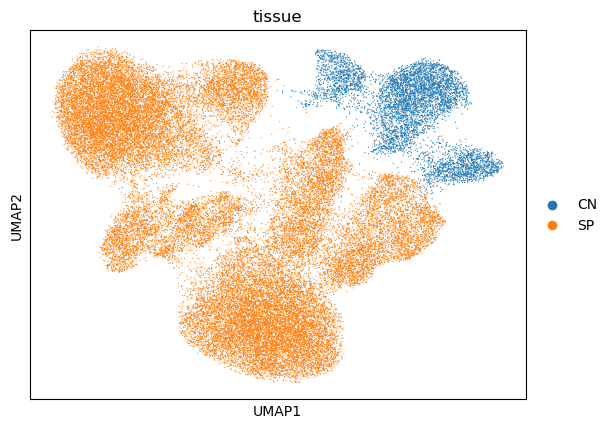

In [26]:
# mdata_subset = mdata
sc.pp.pca(mdata_temp["gex"], svd_solver="arpack", n_comps=10)
sc.pp.neighbors(mdata_temp["gex"], use_rep='X_pca', n_neighbors = 10)
sc.tl.umap(mdata_temp["gex"], min_dist=0.5, spread=1.0)
sc.tl.leiden(mdata_temp["gex"], resolution = 0.5, n_iterations=2, flavor = 'igraph')
sc.pl.umap(mdata_temp["gex"], color=["tissue"])

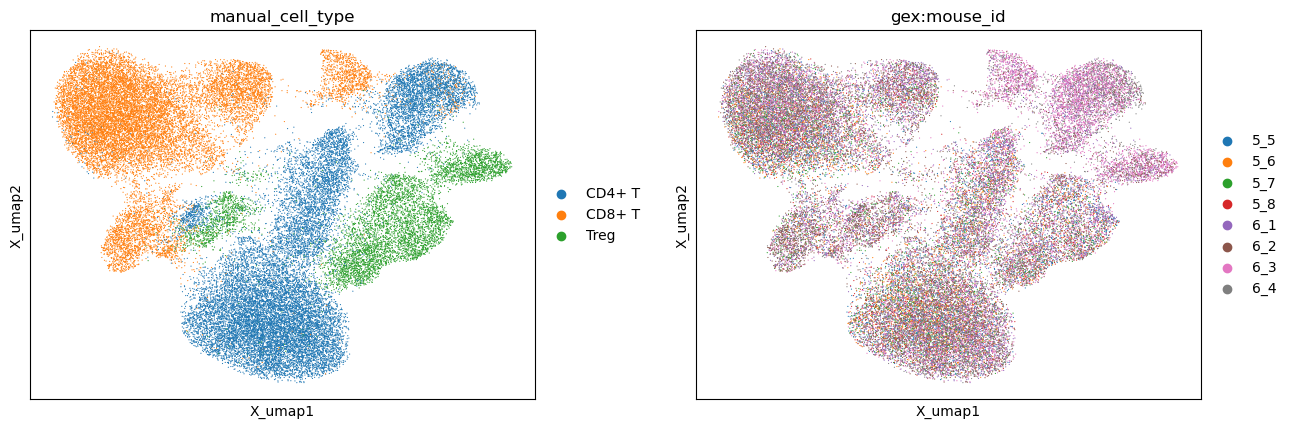

In [27]:
mdata_temp.obs['manual_cell_type'] = mdata_temp.obs['manual_cell_type'].cat.remove_unused_categories()
mu.pl.embedding(mdata_temp, basis="gex:umap", color= ['manual_cell_type', 'gex:mouse_id'], wspace = 0.2, ncols=2, vmin=0)

In [28]:
chemokine_all = [g for g in mdata_temp["gex"].var_names if g.startswith(("Cc", "Cxc", "Cx3c"))]

# markers_in = []
# for i in chemokine:
#     if i in mdata_subset["gex"].var_names:
#         markers_in.append(i) 

In [29]:
sc.tl.rank_genes_groups(mdata_temp["gex"], groupby ="tissue",  method="wilcoxon")
# mask_var = chemokine_all,

# sc.pl.rank_genes_groups_heatmap(mdata_subset["gex"], groupby = "tissue", gene_symbols= chemokine_all,
#                                  cmap='bwr',)

In [30]:
# Get results as DataFrame
df = sc.get.rank_genes_groups_df(mdata_temp["gex"], group="CN")

# Filter to certain genes
df_filtered = df[df["names"].isin(chemokine_all)]

print(df_filtered)

          names     scores  logfoldchanges          pvals      pvals_adj
25        Cxcr6  70.839378        3.519544   0.000000e+00   0.000000e+00
29         Ccr2  63.874111        3.776094   0.000000e+00   0.000000e+00
68         Ccl4  40.917301        5.858549   0.000000e+00   0.000000e+00
71        Cxcr3  39.730820        2.052651   0.000000e+00   0.000000e+00
107        Ccl2  29.007225       27.837631  5.334393e-185  6.426980e-184
117        Ccl5  26.670246        1.811509  1.042383e-156  1.133025e-155
120        Ccr8  26.112003        3.491553  2.663761e-150  2.818795e-149
126        Ccl3  25.147392        7.706865  1.509111e-139  1.539909e-138
148      Cxcl10  21.465565        5.170914  3.267605e-102  2.804811e-101
156      Cx3cr1  20.265497        5.201561   2.593316e-91   2.099851e-90
198       Ccrl2  14.908695        3.664788   2.893535e-50   1.732656e-49
231        Ccl6  11.365472        6.422136   6.212799e-30   3.106400e-29
235      Cxcl16  11.226404        7.766718   3.0254

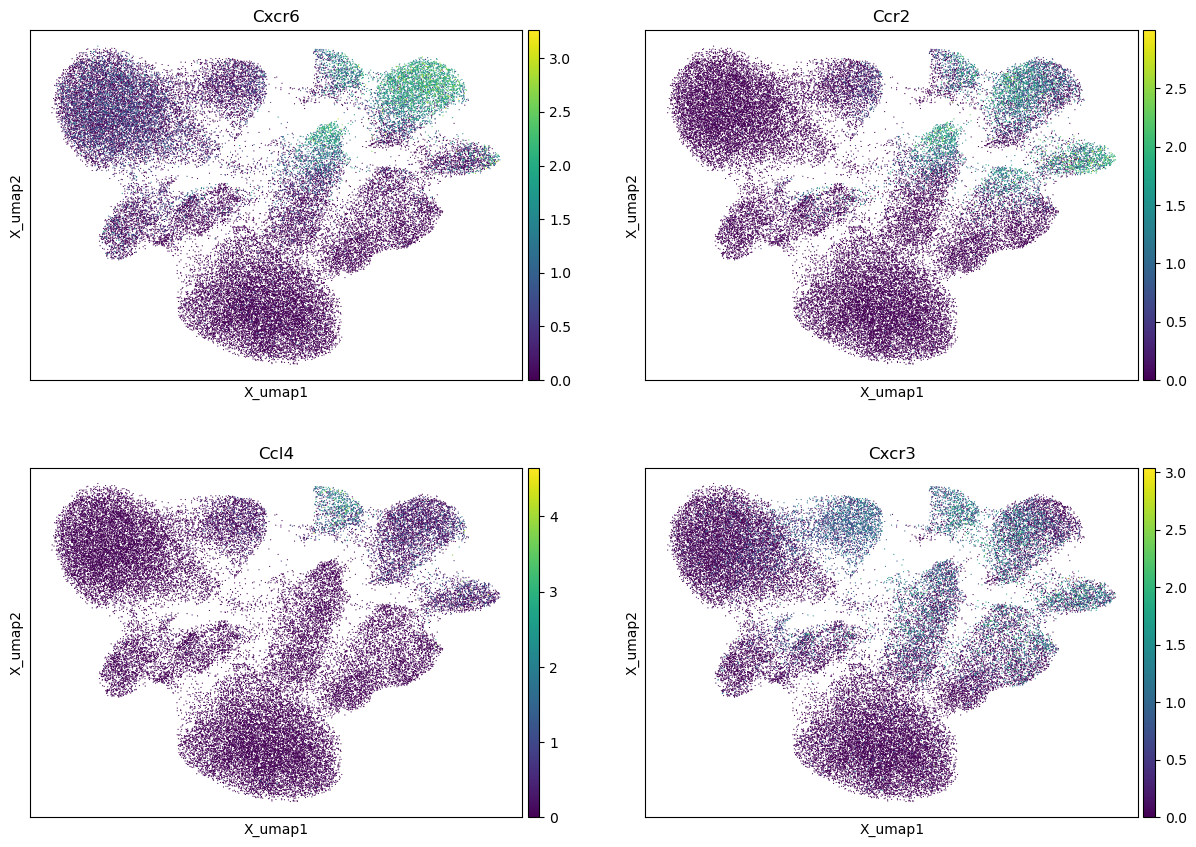

In [31]:
chemokine_topDE = df_filtered['names'].head(10)

mu.pl.embedding(mdata_temp, basis="gex:umap", color= chemokine_topDE[:4], ncols=2, vmin=0)

In [32]:
expr_chemokine = mdata['gex'][:, chemokine_topDE.values].to_df()
expr_chemokine

,Cxcr6,Ccr2,Ccl4,Cxcr3,Ccl2,Ccl5,Ccr8,Ccl3,Cxcl10,Cx3cr1
AAGGTGTAGCCCAACG-1_0516_CNS,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0
AAGTAGCAGATAGGCG-1_0516_CNS,2.245263,0.0,0.0,1.476400,0.0,0.0000,0.989013,0.0,0.0,0.0
AAGTATACACCCAGTA-1_0516_CNS,2.273340,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0
AATGCGACACTAAAGG-1_0516_CNS,1.517474,0.0,0.0,1.517474,0.0,0.0000,0.000000,0.0,0.0,0.0
AATTCGCCAGCTGTAT-1_0516_CNS,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
GTTGTGGGTGGAGCGA-1_0605_SPL,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0
GTTGTGGGTGGATCGC-1_0605_SPL,0.757175,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0
GTTGTGGGTGGCTGTA-1_0605_SPL,0.000000,0.0,0.0,0.613582,0.0,1.6554,0.000000,0.0,0.0,0.0
GTTGTGGGTGTCCCTG-1_0605_SPL,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0


In [33]:
# expr_chemokine.to_csv('top10_chemok.csv')

In [34]:
cellType_markers = ['Cd4', 'Cd8a','Cd8b1','Nkg7','Foxp3', 'Ikzf2', 'Ctla4', 'Il2ra','Ccr6', 'Il22']
cellState_markers = ['Isg15', 'Gbp2', 'Ifih1', 'Icos', 'Cd69', 'Cd28', 'Pdcd1', 'Lag3', 'Havcr2', 'Ccr7', 'Sell', 'Cd27']

markers_in = []
for i in cellType_markers:
    if i in mdata["gex"].var_names:
        markers_in.append(i) 
markers_in
expr_markers = mdata['gex'][:, markers_in].to_df()
expr_markers.to_csv('marker_genes_for_training.csv')

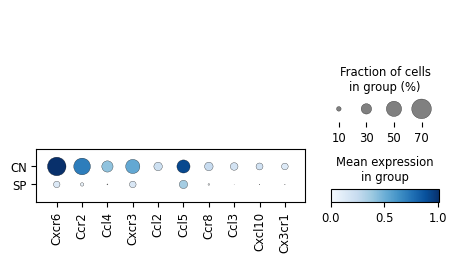

In [35]:
sc.pl.rank_genes_groups_dotplot(mdata_temp["gex"],  groupby="tissue", 
                                   var_names=chemokine_topDE[:10], cmap='Blues')


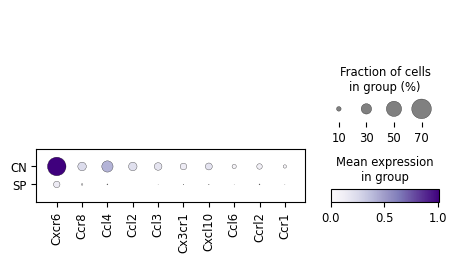

In [36]:
vars_target_df = pd.read_csv('top10_chemok.csv')
sc.pl.rank_genes_groups_dotplot(mdata_temp["gex"],  groupby="tissue", 
                                   var_names=vars_target_df.columns[1:], cmap='Purples')    # 'Greens', 'Reds', 'Purples'


## DAE by MOG dist

In [37]:
# merge df col to mdata obs
mdata.obs['sc_BC'] = mdata.obs.index
mdata.obs['TCRdist_short'] = True
mdata_DF = mdata.obs[['VDJ_1_cdr3_aa', 'TCRdist_short']]
mdata_DF.dropna(inplace=True)
mdata_DF.set_index('VDJ_1_cdr3_aa', inplace=True)

TCR_all['cdr3_b_aa_trimed'] = TCR_all['cdr3_b_aa'].str[1:-1]
merged_obs = mdata_DF.merge(TCR_all, how='left', left_on='VDJ_1_cdr3_aa', right_on='cdr3_b_aa_trimed')

mdata_DF

,TCRdist_short
VDJ_1_cdr3_aa,
ASSLAGAGQLY,True
ASSQETGDNERLF,True
ASSPRQGYEQY,True
ASGDWGGARNTLY,True
ASGETGGNYAEQF,True
...,...
GARDINERLF,True
AWRVSTEVF,True
ASSLDLGGDQDTQY,True


In [38]:
mdata.obs['VDJ_1_cdr3_aa']

AAGGTGTAGCCCAACG-1_0516_CNS              None
AAGTAGCAGATAGGCG-1_0516_CNS       ASSLAGAGQLY
AAGTATACACCCAGTA-1_0516_CNS     ASSQETGDNERLF
AATGCGACACTAAAGG-1_0516_CNS       ASSPRQGYEQY
AATTCGCCAGCTGTAT-1_0516_CNS     ASGDWGGARNTLY
                                    ...      
GTTGTGGGTGGAGCGA-1_0605_SPL        GARDINERLF
GTTGTGGGTGGATCGC-1_0605_SPL         AWRVSTEVF
GTTGTGGGTGGCTGTA-1_0605_SPL    ASSLDLGGDQDTQY
GTTGTGGGTGTCCCTG-1_0605_SPL        ASGSKNTEVF
GTTGTGGGTGTTACCC-1_0605_SPL        ASSLGQTEVF
Name: VDJ_1_cdr3_aa, Length: 43448, dtype: object

## GIANA embedings

In [41]:
%cd /ihome/ylee/yiz133/Code/deepTCR/GIANA_output/

/ihome/ylee/yiz133/Code/deepTCR/GIANA_output


In [42]:
# Create a sample 2D matrix
matrix = pd.read_csv('cdr3_id--RotationEncodingBL62.txt_EncodingMatrix.txt', sep = '\t', header = None)

matrix.rename(columns={0:'cdr3_b_aa', 1: 'BC'}, inplace=True)

# for i in range(len(matrix)):
#     matrix['BC'] = matrix.iloc[i,2].split('_')[-1]

In [43]:
matrix = pd.merge(matrix, cell_type, left_on='BC', right_index=True, how='inner')
matrix.set_index('BC', inplace=True)
matrix

NameError: name 'cell_type' is not defined

In [ ]:
matrix.isnull().values.any()

### Merge dist with GIANA embedings

In [ ]:
TCR_matched = matrix[matrix['cdr3_b_aa'].isin(TCR_selected['cdr3_b_aa'])]
TCR_matched

In [ ]:
TCR_matched['manual_cell_type'].value_counts()

In [ ]:
TCR_matched['sample'].value_counts()

## sklearn KNN clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

EM_dim = 97
# max = 97
EM_matrix = TCR_matched.iloc[:,1:EM_dim]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(EM_matrix)

k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, copy_x=False)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, svd_solver='randomized', random_state=42)
X_pca_GIANA = pca.fit_transform(X_scaled)

import umap
umap = umap.UMAP(n_components=2, random_state=42, n_neighbors = 20, min_dist = 0.5)
# umap = umap.UMAP(n_components=2, random_state=42)

X_r = umap.fit_transform(X_pca_GIANA)

In [ ]:
# plot
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(10,10))

# Create DataFrame
df = pd.DataFrame({
    'x': X_r[:, 0],
    'y': X_r[:, 1],
    'label': TCR_matched['sample']
})
sns.scatterplot(data=df, x='x', y='y', hue='label', s=10, ax = axes[0][0])

df2 = pd.DataFrame({
    'x': X_r[:, 0],
    'y': X_r[:, 1],
    'label': TCR_matched['manual_cell_type']
})
sns.scatterplot(data=df2, x='x', y='y', hue='label', s=10, ax = axes[0][1])

df3 = pd.DataFrame({
    'x': X_r[:, 0],
    'y': X_r[:, 1],
    'label': clusters
})
sns.scatterplot(data=df3, x='x', y='y', hue='label', s=10, palette="deep", ax = axes[1][0])


In [ ]:
aa

## deepTCR embeddings

In [ ]:
%cd /ihome/ylee/yiz133/Code/deepTCR/unSupervised_cluster

In [ ]:
# Create a sample 2D matrix
matrix = pd.read_csv('DTCRU_extracted_features_96_0605.csv', sep = ',')
matrix.drop(columns={'Label'}, inplace=True)

matrix['CDR3_Beta'] = matrix['CDR3_Beta'].str[1:-1]

matrix = pd.merge(matrix, TCR_selected, left_on='CDR3_Beta', right_on='cdr3_b_aa', how='inner')

In [ ]:
m_right = mdata.obs[['VDJ_1_cdr3_aa','manual_cell_type','sample']]
m_right['BC'] = mdata.obs.index
deepTCR_matrix = pd.merge(matrix, m_right, left_on='CDR3_Beta', right_on = 'VDJ_1_cdr3_aa', how='inner')
deepTCR_matrix

In [ ]:
deepTCR_matrix['manual_cell_type'].value_counts()

In [ ]:
deepTCR_matrix['sample'].value_counts()

In [ ]:
EM_dim = 97
EM_matrix_deepTCR = deepTCR_matrix.iloc[:,3:EM_dim]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(EM_matrix_deepTCR)

k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, copy_x=False)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, svd_solver='randomized', random_state=42)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=30, kernel='rbf', gamma=0.1)

# generate features
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# EM_matrix_deepTCR = poly.fit_transform(EM_matrix_deepTCR)

import umap
umap = umap.UMAP(n_components=2, random_state=42, n_neighbors = 20, min_dist = 0.5)
# umap = umap.UMAP(n_components=2, random_state=42)

# transform
X_pca_deepTCR = kpca.fit_transform(EM_matrix_deepTCR)
X_r = umap.fit_transform(X_pca_deepTCR)


In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Create DataFrame
df = pd.DataFrame({
    'x': X_r[:, 0],
    'y': X_r[:, 1],
    'label': deepTCR_matrix['sample']
})
sns.scatterplot(data=df, x='x', y='y', hue='label', s=30, ax = axes[0])

df2 = pd.DataFrame({
    'x': X_r[:, 0],
    'y': X_r[:, 1],
    'label': deepTCR_matrix['manual_cell_type']
})
sns.scatterplot(data=df2, x='x', y='y', hue='label', s=20, ax = axes[1])


##  Diff in TCR embedings between clusters

In [ ]:
# GIANA emb
# M = matrix.copy()

# deepTCR emb
M = deepTCR_matrix.copy()
M_embs = M.iloc[:,3:99]
M_obs = M.drop(M.columns[3:99], axis=1)

kpca = KernelPCA(n_components=30, kernel='rbf', gamma=0.1)
M_embs = kpca.fit_transform(M_embs)

M_obs['tissue'] = M_obs['sample'].str[:3]

In [ ]:
import anndata as ad

adata_embs = ad.AnnData(M_embs)
adata_embs.obs = M_obs

adata_embs

In [ ]:
sc.tl.rank_genes_groups(adata_embs, groupby = "tissue", reference = 'SPL')
    
sc.pl.rank_genes_groups_violin(adata_embs,  n_genes=5)

# END

In [ ]:
aaa

## Merge with deepTCR MOG classified TCR (Not used)

In [ ]:
# %cd "/ihome/ylee/yiz133/Code/Data processing/data/deepTCR_pred"

In [ ]:
# deepTC_pred = pd.read_csv('MOG_specifi_prob.csv')
# thres = 0.6
# deepTC_pred = deepTC_pred[deepTC_pred['0'] > thres]
# deepTC_pred.set_index('cell_id', inplace = True)
# deepTC_pred

# merge_DF = pd.merge(mdata.obs, deepTC_pred,  left_index=True, right_index=True, how='outer')
# MOG_speficy_DF = merge_DF.dropna()

# ind_mask = mdata.obs.index.isin(deepTC_pred.index)

# MOG_speficy_DF['manual_cell_type'].value_counts()

## with PCA and neighbor

In [ ]:
from sklearn.decomposition import PCA
import umap
import igraph as ig
import leidenalg

pca = PCA(n_components=25, random_state=42)
X_pca = pca.fit_transform(X_scaled)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_pca)

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-nearest neighbors
knn = NearestNeighbors(n_neighbors=15)
knn.fit(X_pca)
adj_matrix = knn.kneighbors_graph(X_pca, mode='connectivity')

In [ ]:
# Convert the adjacency matrix to a CSR format if it's not already
adj_csr = adj_matrix.tocsr()

# Create an igraph graph from the adjacency matrix
sources, targets = adj_csr.nonzero()
edges = list(zip(sources, targets))
g = ig.Graph(edges=edges, directed=False)


In [ ]:
partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
labels = np.array(partition.membership)


In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=10)
plt.title('UMAP Projection with Leiden Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
import anndata as ad
import scanpy as sc

EM_matrix = EM_matrix.dropna()
adata = ad.AnnData(EM_matrix)
# adata.obs['cluster'] = clusters
adata.obs['tissue'] = tissue
adata.obs['AA_seq'] = matrix.iloc[:,1]
adata


In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)


In [ ]:
np.isnan(adata.X).any()

In [ ]:
nan_indices = np.argwhere(np.isnan(adata.X))
nan_indices

In [ ]:
sc.pp.pca(adata, svd_solver="arpack", n_comps=20)
sc.pp.neighbors(mdata["gex"], n_neighbors = 20)
sc.tl.umap(mdata["gex"], min_dist=0.5, spread=1.0)
sc.tl.leiden(mdata["gex"], resolution = 0.5, n_iterations=2, flavor = 'igraph')
sc.pl.umap(mdata["gex"], color=["leiden"])


In [ ]:
# adata.write('TCRemb_2cluster.h5ad')